# **Single linear regression**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Load the data

In [22]:
data = pd.read_csv('sample_data/1.01.+Simple+linear+regression.csv')

In [23]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [24]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


**Create your first regression**

Define the dependent and the independent variables

In [25]:
y = data['GPA']
x1 = data['SAT']
# 从 data 数据集中取出两列：
# y：因变量（目标变量）—— GPA
# x1：自变量（特征变量）—— SAT 分数

**Explore the data**

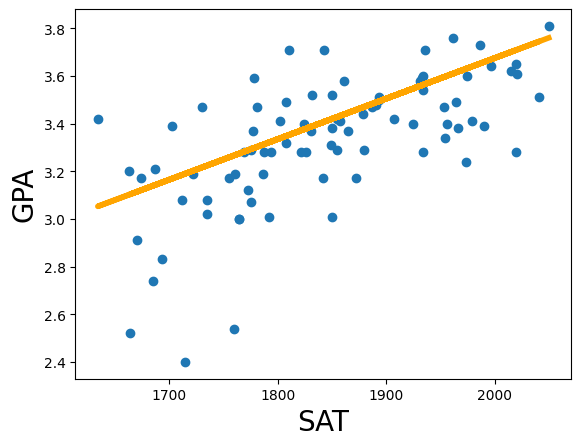

In [26]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()
# 画出一个 散点图，横轴是 SAT，纵轴是 GPA。
# 这样可以直观地看到 SAT 和 GPA 之间是否有线性关系。

**calculate regression:**

GPA = 0.2750 + 0.0017 * SAT

**Regression itself**

In [27]:
x = sm.add_constant(x1)
# statsmodels 需要在自变量中显式加一个常数项（intercept 截距）。
# 这一步就是给 x1 加一列常数 1，方便回归模型拟合截距。

results = sm.OLS(y,x).fit()
results.summary()

# sm.OLS = Ordinary Least Squares = 普通最小二乘回归
# 用 SAT (x) 来预测 GPA (y)。
# fit() 是训练模型。

# 打印出回归分析的 详细结果表格，包括：
# 系数（coef）：截距和 SAT 的回归系数
# R-squared：决定系数，表示模型能解释多少 GPA 的波动
# P>|t|：显著性水平，判断系数是否显著不为 0
# F-statistic：整体回归显著性
# 残差统计 等

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           7.20e-11
Time:                        16:03:48   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| 变量             | 系数 (coef) | 解释                                                                |
| -------------- | --------- | ----------------------------------------------------------------- |
| **const** (截距) | 0.2750    | 当 SAT = 0 时，预测 GPA = 0.275（没有实际意义，因为 SAT 不可能为 0，但回归模型需要这个截距）。     |
| **SAT**        | 0.0017    | SAT 每增加 1 分，GPA 平均增加 **0.0017 分**。如果 SAT 增加 100 分，GPA 增加约 0.17 分。 |


P>|t|：

截距 p=0.503 → 不显著

SAT p=0.000 → 高度显著，说明 SAT 对 GPA 的影响非常可信

[0.025, 0.975]：95% 置信区间

SAT 的区间在 (0.001, 0.002) → 始终大于 0，进一步证明影响显著

诊断统计

Omnibus / Prob(Omnibus)、Jarque-Bera (JB)、Skew、Kurtosis
这些是 残差的正态性检验。

p 值很小（0.002, 0.000310），说明残差不是完全正态分布（可能偏态/峰度较高）。

Durbin-Watson: 0.950
检验残差自相关。理想值接近 2。

这里 <1，说明可能存在 正自相关。

Cond. No. 3.29e+04
条件数很大，可能存在 多重共线性问题。但这里只有一个自变量 SAT，所以主要是数值尺度问题（SAT 分数比较大）。

总结解释

SAT 对 GPA 有显著正向影响，SAT 越高，GPA 越高。

模型能解释 GPA 波动的 40%，还有其他因素（学习习惯、课程难度等）未纳入模型。

残差不完全正态、存在一定自相关，模型在预测上有局限性。

## **SST SSR SSE example**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

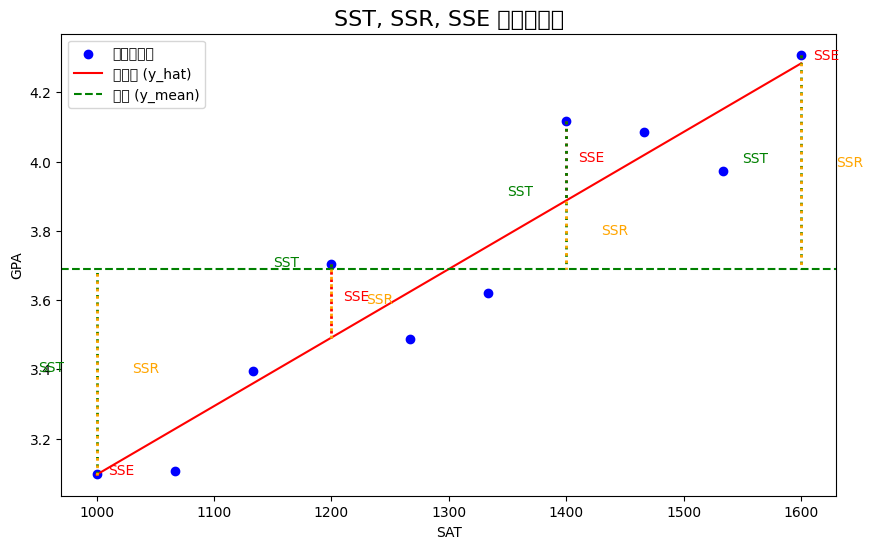

(np.float64(1.6244918093428513),
 np.float64(1.4364621611845287),
 np.float64(0.18802964815832338),
 np.float64(0.8842532494919839))

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据
np.random.seed(42)
x = np.linspace(1000, 1600, 10)
y = 0.002 * x + 1 + np.random.normal(0, 0.2, len(x))  # GPA ~ SAT + 噪声

# 回归拟合
coef = np.polyfit(x, y, 1)
y_hat = np.polyval(coef, x)
y_mean = np.mean(y)

# 计算分量
SST = np.sum((y - y_mean)**2)
SSR = np.sum((y_hat - y_mean)**2)
SSE = np.sum((y - y_hat)**2)

# 绘图
plt.figure(figsize=(10,6))
plt.scatter(x, y, color="blue", label="真实数据点")
plt.plot(x, y_hat, color="red", label="回归线 (y_hat)")
plt.axhline(y_mean, color="green", linestyle="--", label="均值 (y_mean)")

# 标注几条线来说明 SST, SSE, SSR
for i in range(0, len(x), 3):
    # SSE: y 和 y_hat 之间的差
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], color="red", linestyle=":", linewidth=2)
    plt.text(x[i]+10, (y[i]+y_hat[i])/2, "SSE", color="red", fontsize=10)

    # SST: y 和 y_mean 之间的差
    plt.plot([x[i], x[i]], [y[i], y_mean], color="green", linestyle=":", linewidth=2)
    plt.text(x[i]-50, (y[i]+y_mean)/2, "SST", color="green", fontsize=10)

    # SSR: y_hat 和 y_mean 之间的差
    plt.plot([x[i], x[i]], [y_hat[i], y_mean], color="orange", linestyle=":", linewidth=2)
    plt.text(x[i]+30, (y_hat[i]+y_mean)/2, "SSR", color="orange", fontsize=10)

plt.title("SST, SSR, SSE 分解示意图", fontsize=16)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.legend()
plt.show()

SST, SSR, SSE, SSR/SST

# 蓝点 → 真实的 GPA 数据点

# 红线 → 回归线（预测 GPA）

# 绿虚线 → GPA 的均值线

# SST (绿色虚线段) → 实际值相对均值的偏差（总波动）（蓝点到绿色虚线）

# SSR (橙色虚线段) → 模型预测值相对均值的偏差（模型能解释的部分）（红线到绿色虚线（平均值））

# SSE (红色虚线段) → 实际值与预测值的差距（残差，模型没解释掉的部分）（蓝点到红线）

# SST = SSR + SSE 总变异 (SST) 可以被分解为回归变异 (SSR) 和误差变异 (SSE)



# **Multiple linear regression and adjusted R-squared**

Load data

In [29]:
data = pd.read_csv('sample_data/1.02.+Multiple+linear+regression.csv') # 这个data不可用！！！！！！！！

**这个数据加了随机地给每个学生分配一个､ 两个或三个。但在results.summary证实了这个加的数据是没有用的，因为其p值为0.76。对于一个具有统计学意义的系数, 我们希望p值小于0.05, 我们的结论是, 随机变量1至3不仅恶化了模型的解释能力**

In [30]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [31]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [32]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           6.58e-10
Time:                        16:03:48   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**在回归中，p 值检验的是「该变量的系数是否显著不为 0」。**
**如果 p < 0.05（常用标准），说明该变量对因变量（这里是 GPA）有显著影响。**
**如果 p > 0.05，说明该变量对 GPA 的影响可能只是随机噪声，不显著。**

**你说的新变量 p=0.76**
**这个 p 值远大于 0.05。**

**说明：在控制 SAT 的情况下，这个新变量对 GPA几乎没有贡献，即「统计上不显著」。**

R²（决定系数）：永远不会下降，哪怕你加一个完全没用的变量，R² 也会增加或保持不变。
👉 这容易导致“虚假提升”，让人误以为模型更好。

Adjusted R²（调整后的 R²）：会对“变量数量”进行惩罚。
👉 如果你加的新变量没有实际贡献，Adjusted R² 就会下降。

R² = 0.407（表面上“变大了”！）
Adjusted R² = 0.392（反而变小了）
👉 说明鞋码对 GPA 没有帮助，甚至让模型更差。

# **Dummy Variables（虚拟变量）**

In [35]:
dummyVar_data = pd.read_csv('sample_data/1.03.+Dummies.csv')

In [36]:
dummyVar_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [38]:
data = dummyVar_data.copy()

In [39]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
# 用map function把'Yes'，'No'转换为1，0

In [40]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [41]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


46% of the student have attended

**Dummy variable Regression**

In [42]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [43]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           2.19e-15
Time:                        16:12:46   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**calculate regression:**

GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy

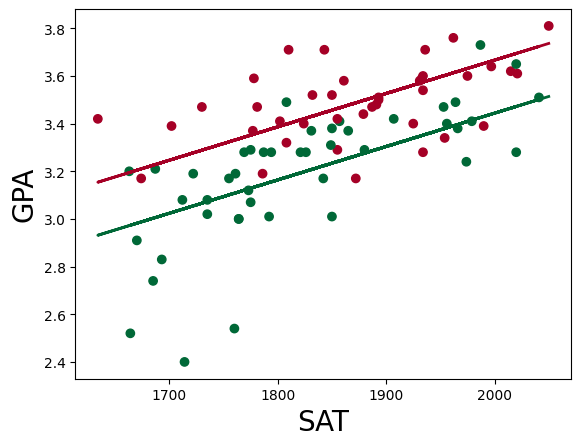

In [49]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.6439 + 0.0014 * data['SAT'] + 0.2226 * 1
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# 画一个散点图：
# 横轴 = SAT
# 纵轴 = GPA (y)
# 点的颜色 = 是否出勤 (Attendance)
# cmap='RdYlGn_r' → 红到绿的渐变色

# 回归方程的预测值：
# 没出勤（Attendance=0） → GPA = 0.6439 + 0.0014 * SAT
# 有出勤（Attendance=1） → GPA = 0.6439 + 0.0014 * SAT + 0.2226*1

# 在散点图上叠加两条回归直线：(fig)
# 绿色线：没出勤
# 红色线：出勤

# plt.xlabel(显示variable name)


# **How to make predictions based on the regressions we create**

In [50]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [52]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [53]:
new_data.rename(index={0:'Bob',1:'Alice'})
# 加row name

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [55]:
predictions = results.predict(new_data)
predictions

,0
0,3.023513
1,3.204163


# **predict()，（会自动设置预测公式）会把 新数据 代入回归方程：**
**y^​=β0​+β1​⋅SAT+β2​⋅Attendance**

In [57]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})
# 把预测值拼接回 new_data

,const,SAT,Attendance,predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
